In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\nikhi\\Downloads\\train_dataset.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [3]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.Potability.value_counts()

0    1398
1     895
Name: Potability, dtype: int64

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


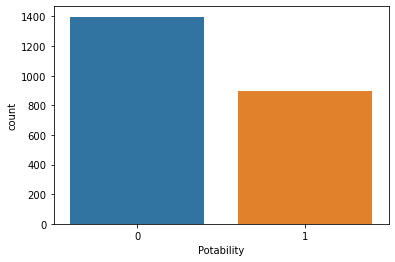

In [6]:
sns.countplot(data['Potability'])
plt.show()

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


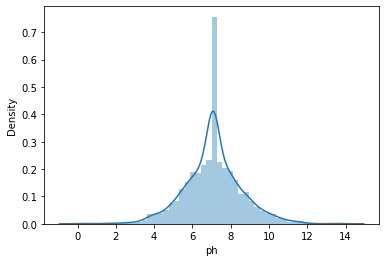

In [7]:
sns.distplot(data['ph'])
plt.show()

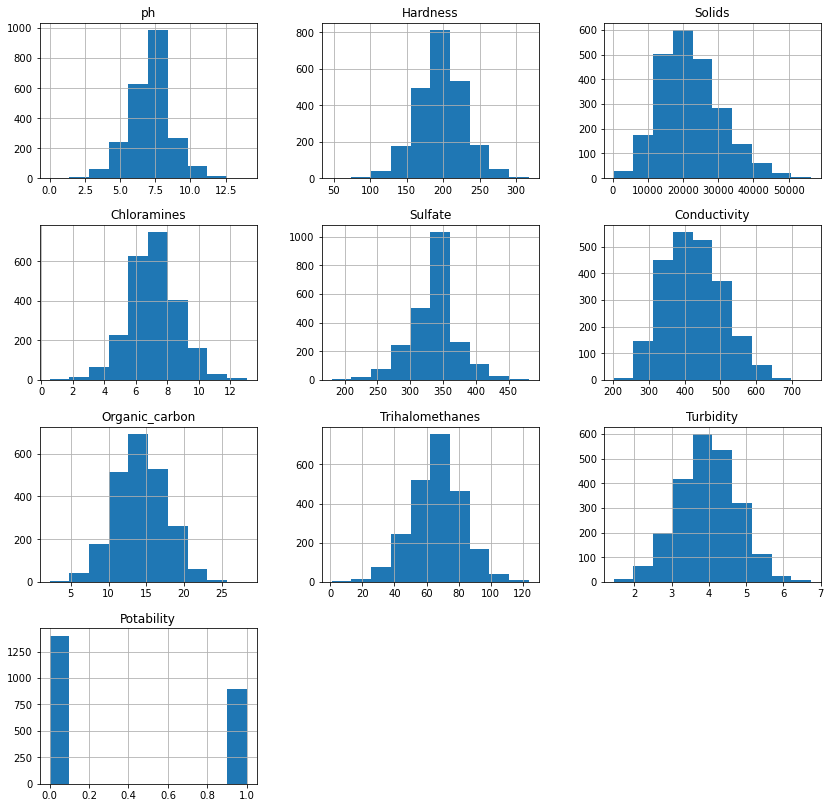

In [8]:
data.hist(figsize=(14,14))
plt.show()

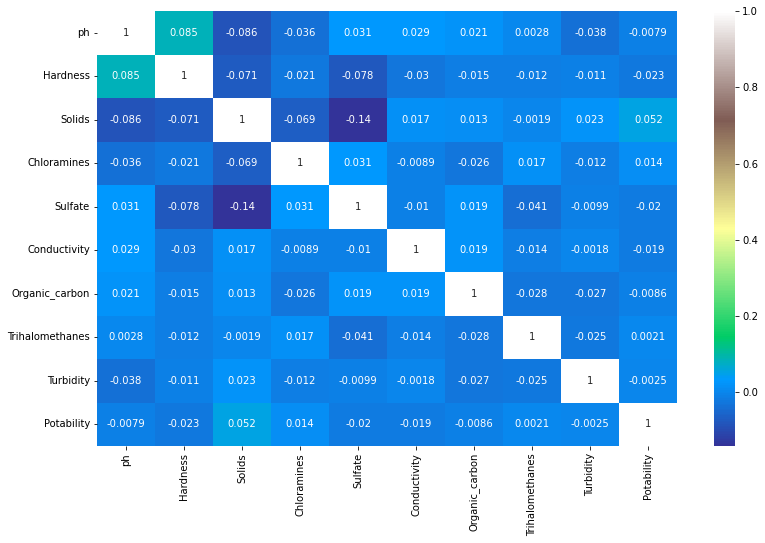

In [9]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True,cmap='terrain')
plt.show()

<AxesSubplot:>

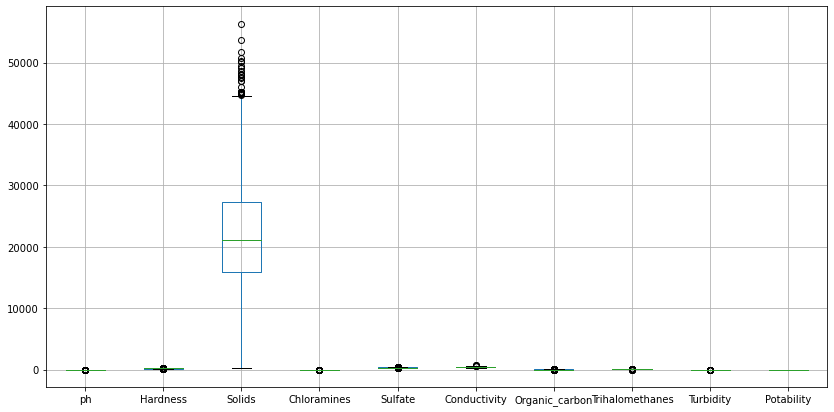

In [10]:
data.boxplot(figsize=(14,7))

In [11]:
X = data.drop('Potability',axis=1)
Y= data['Potability']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

Train Decision Tree Classifier and check accuracy

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [14]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")


Accuracy Score = 60.348583877995644
Confusion Matrix =
 [[193  81]
 [101  84]]
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       274
           1       0.51      0.45      0.48       185

    accuracy                           0.60       459
   macro avg       0.58      0.58      0.58       459
weighted avg       0.60      0.60      0.60       459



In [15]:
res = dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

Apply Hyper Parameter Tuning

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.601 using {'criterion': 'gini', 'min_samples_split': 14, 'splitter': 'random'}
0.587 (0.038) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.592 (0.032) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.589 (0.035) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.579 (0.034) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.587 (0.035) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.578 (0.033) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.591 (0.036) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.585 (0.036) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.590 (0.032) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.585 (0.035) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.589 (0.032) with: {'criterion': 'gini',

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.datasets import load_iris

# Load a sample dataset (replace with your actual dataset)
data = load_iris()
X, y = pd.DataFrame(data.data, columns=data.feature_names), pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters for GradientBoostingClassifier
param_gb = {'n_estimators': [60, 70, 80, 100, 200, 300, 400, 500, 600, 700]}
grid_Grd = GridSearchCV(GradientBoostingClassifier(), param_grid=param_gb, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Gradient Boosting Best Estimator: {grid_Grd.best_params_}, Best Score: {grid_Grd.best_score_}")

# Parameters for BaggingClassifier
param_bag = {'n_estimators': [60, 70, 80, 100, 200, 300, 400, 500, 600, 700]}
grid_Bag = GridSearchCV(BaggingClassifier(), param_grid=param_bag, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Bagging Best Estimator: {grid_Bag.best_params_}, Best Score: {grid_Bag.best_score_}")


Gradient Boosting Best Estimator: {'n_estimators': 60}, Best Score: 0.9416666666666668
Bagging Best Estimator: {'n_estimators': 500}, Best Score: 0.95


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

